In [7]:
#!pip install numpy==1.24.3 pandas==1.5.3 scikit-learn==1.2.2 joblib==1.3.2


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
df=pd.read_csv("zameen-updated.csv")

In [10]:
df.head(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3.0,5.6 Marla,For Sale,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15487 entries, 0 to 15486
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    15487 non-null  int64  
 1   location_id    15487 non-null  int64  
 2   page_url       15487 non-null  object 
 3   property_type  15487 non-null  object 
 4   price          15487 non-null  int64  
 5   location       15486 non-null  object 
 6   city           15486 non-null  object 
 7   province_name  15486 non-null  object 
 8   latitude       15486 non-null  float64
 9   longitude      15486 non-null  float64
 10  baths          15486 non-null  float64
 11  area           15486 non-null  object 
 12  purpose        15486 non-null  object 
 13  bedrooms       15486 non-null  float64
 14  date_added     15486 non-null  object 
 15  agency         3674 non-null   object 
 16  agent          3674 non-null   object 
 17  Area Type      15486 non-null  object 
 18  Area S

In [12]:
df = df.drop(columns=['property_id', 'page_url', 'date_added', 'agent'])


In [13]:
import sklearn
import joblib

print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("joblib version:", joblib.__version__)

scikit-learn version: 1.2.2
pandas version: 1.5.3
numpy version: 1.24.3
joblib version: 1.3.2


In [14]:
df.isnull().sum()

,0
location_id,0
property_type,0
price,0
location,1
city,1
province_name,1
latitude,1
longitude,1
baths,1
area,1


In [15]:
df.drop('agency',axis=1,inplace=True)

In [16]:
df['area'] = pd.to_numeric(df['area'], errors='coerce')


In [17]:
#df.dropna(subset=['area'], inplace=True)

In [18]:
print(df.head())

   location_id property_type     price     location       city  \
0         3325          Flat  10000000         G-10  Islamabad   
1         3236          Flat   6900000         E-11  Islamabad   
2          764         House  16500000         G-15  Islamabad   
3          340         House  43500000    Bani Gala  Islamabad   
4         3226         House   7000000  DHA Defence  Islamabad   

       province_name   latitude  longitude  baths  area   purpose  bedrooms  \
0  Islamabad Capital  33.679890  73.012640    2.0   NaN  For Sale       2.0   
1  Islamabad Capital  33.700993  72.971492    3.0   NaN  For Sale       3.0   
2  Islamabad Capital  33.631486  72.926559    6.0   NaN  For Sale       5.0   
3  Islamabad Capital  33.707573  73.151199    4.0   NaN  For Sale       4.0   
4  Islamabad Capital  33.492591  73.301339    3.0   NaN  For Sale       3.0   

  Area Type  Area Size Area Category  
0     Marla        4.0     0-5 Marla  
1     Marla        5.6    5-10 Marla  
2     Marla

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15487 entries, 0 to 15486
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    15487 non-null  int64  
 1   property_type  15487 non-null  object 
 2   price          15487 non-null  int64  
 3   location       15486 non-null  object 
 4   city           15486 non-null  object 
 5   province_name  15486 non-null  object 
 6   latitude       15486 non-null  float64
 7   longitude      15486 non-null  float64
 8   baths          15486 non-null  float64
 9   area           0 non-null      float64
 10  purpose        15486 non-null  object 
 11  bedrooms       15486 non-null  float64
 12  Area Type      15486 non-null  object 
 13  Area Size      15486 non-null  float64
 14  Area Category  15486 non-null  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 1.8+ MB


In [20]:
df.isnull().sum().sum()

15498

In [21]:
df.isnull().sum()

,0
location_id,0
property_type,0
price,0
location,1
city,1
province_name,1
latitude,1
longitude,1
baths,1
area,15487


In [22]:
df.drop('area',axis=1,inplace=True)

In [23]:
df.isnull().sum().sum()

11

In [24]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['property_type', 'location', 'city', 'province_name', 'purpose', 'Area Type', 'Area Category']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [25]:
df['city'].unique()
df

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size,Area Category
0,3325,1,10000000,344,1,0,33.679890,73.012640,2.0,1,2.0,1,4.0,0
1,3236,1,6900000,288,1,0,33.700993,72.971492,3.0,1,3.0,1,5.6,9
2,764,2,16500000,349,1,0,33.631486,72.926559,6.0,1,5.0,1,8.0,9
3,340,2,43500000,152,1,0,33.707573,73.151199,4.0,1,4.0,0,2.0,1
4,3226,2,7000000,246,1,0,33.492591,73.301339,3.0,1,3.0,1,8.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,3444,2,57500000,463,1,0,33.662782,73.077793,8.0,1,7.0,1,14.0,3
15483,424,2,25000000,755,1,0,33.570792,73.145256,8.0,1,10.0,0,1.0,1
15484,453,2,11000000,419,1,0,33.626837,72.982730,5.0,1,6.0,1,5.0,0
15485,180,1,55000000,315,1,0,33.729979,73.077064,2.0,1,3.0,1,4.4,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15487 entries, 0 to 15486
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    15487 non-null  int64  
 1   property_type  15487 non-null  int64  
 2   price          15487 non-null  int64  
 3   location       15487 non-null  int64  
 4   city           15487 non-null  int64  
 5   province_name  15487 non-null  int64  
 6   latitude       15486 non-null  float64
 7   longitude      15486 non-null  float64
 8   baths          15486 non-null  float64
 9   purpose        15487 non-null  int64  
 10  bedrooms       15486 non-null  float64
 11  Area Type      15487 non-null  int64  
 12  Area Size      15486 non-null  float64
 13  Area Category  15487 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 1.7 MB


In [27]:
X = df.drop('price', axis=1)
y = df['price']


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already split

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Step 3: Predict
y_pred = model.predict(X_test_imputed)

# Step 4: Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.31993994547185045
MSE: 1110899170217084.6


In [38]:
import joblib

# Save model
joblib.dump(model, 'random_forest_model.pkl')

# Save scaler (if used)
#joblib.dump(scaler, 'scaler.pkl')

['random_forest_model.pkl']

In [ ]:
from google.colab import files
files.download('random_forest_model.pkl')


In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample column
df = pd.DataFrame({
    'city': ['Lahore', 'Karachi', 'Islamabad', 'Lahore', 'Karachi']
})

# Encoder
le = LabelEncoder()
df['city_encoded'] = le.fit_transform(df['city'])

# Show mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)


Label Encoding Mapping:
{'Islamabad': 0, 'Karachi': 1, 'Lahore': 2}


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("zameen-updated.csv")  # Replace with your actual CSV file

# List of categorical columns
cat_cols = ['property_type', 'location', 'city', 'province_name', 'purpose', 'Area Type', 'Area Category']

# Dictionary to store encoders
encoders = {}

# Encode and print mapping
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
    print(f"\nEncoding for column: '{col}'")
    for cls, val in zip(le.classes_, le.transform(le.classes_)):
        print(f"'{cls}': {val}")



Encoding for column: 'property_type'
'Farm House': 0
'Flat': 1
'House': 2
'Lower Portion': 3
'Penthouse': 4
'Room': 5
'Upper Portion': 6
'nan': 7

Encoding for column: 'location'
'12th Avenue': 0
'204 Chak Road': 1
'7th Avenue': 2
'9th Avenue': 3
'AGHOSH': 4
'APP Employees Co-operative Housing Society': 5
'AR Cottages': 6
'ASF Housing Scheme': 7
'ASF Tower': 8
'AWT Army Welfare Trust': 9
'Aabpara Coop Housing Society': 10
'Aashiana Road': 11
'Abdali Road': 12
'Abdalians Cooperative Housing Society': 13
'Abdul Sattar Edhi Road': 14
'Abdullah Ahmed Road': 15
'Abdullah City': 16
'Abdullah Garden': 17
'Abdullah Haroon Road': 18
'Abdullahpur': 19
'Abid Majeed Road': 20
'Abid Market': 21
'Abid Town': 22
'Abul Hassan Isphani Road': 23
'Acro Green - Bankers Avenue': 24
'Adan Villas': 25
'Adiala Road': 26
'Affandi Colony': 27
'Afghanabad': 28
'Afshan Colony': 29
'Afzal Park': 30
'Agha Shahi Avenue': 31
'Agrics Town': 32
'Ahbab Colony': 33
'Ahmad Abad': 34
'Ahmad Avenue': 35
'Ahmad Housing Soci

In [41]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in X_train and X_test
# Use the mean strategy for simplicity, you might want to explore other strategies
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now train the model with the imputed data
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [42]:
plt.style.use('seaborn-v0_8-dark-palette')  # Stylish theme
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 120


<ipython-input-43-2893202206>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Spectral', linewidths=1, linecolor='black', cbar_kws={"shrink": .8})
<ipython-input-43-2893202206>:4: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-2893202206>:5: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig('correlation_heatmap.png', bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


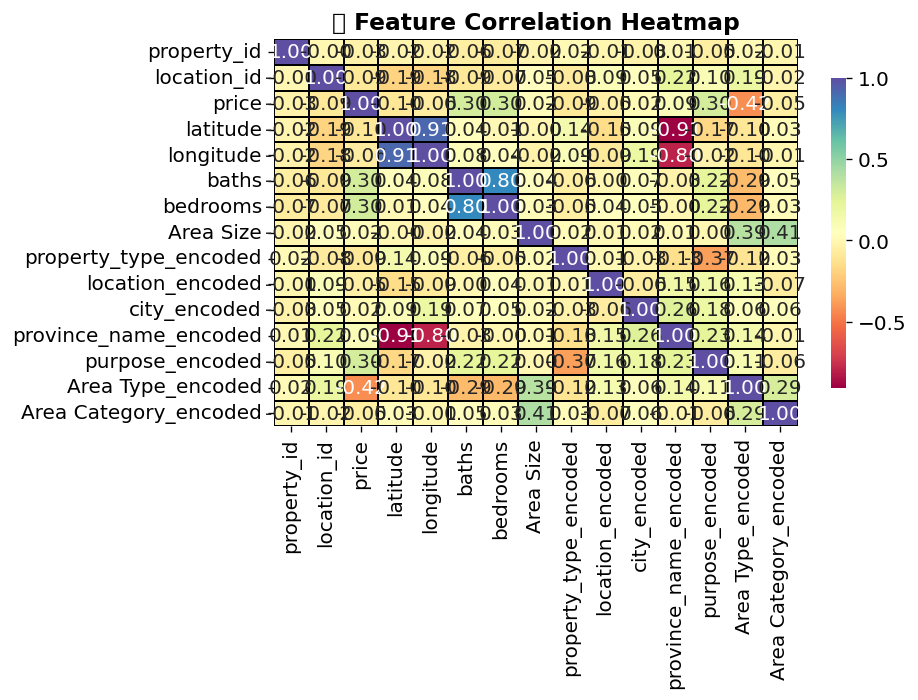

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Spectral', linewidths=1, linecolor='black', cbar_kws={"shrink": .8})
plt.title('🔥 Feature Correlation Heatmap', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()


In [44]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in X_train and X_test
# Use the mean strategy for simplicity, you might want to explore other strategies
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now train the model with the imputed data
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

plt.style.use('seaborn-v0_8-muted')
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 120


<ipython-input-46-264325544>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='property_type', data=df, palette='coolwarm')
<ipython-input-46-264325544>:6: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-264325544>:7: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.savefig('property_type_distribution.png', bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


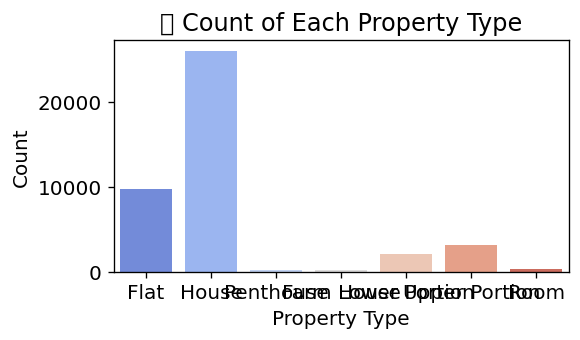

In [46]:
plt.figure(figsize=(5,3))
sns.countplot(x='property_type', data=df, palette='coolwarm')
plt.title("🏠 Count of Each Property Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('property_type_distribution.png', bbox_inches='tight')
plt.show()


<ipython-input-47-991272198>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data=df, palette='Set2')
<ipython-input-47-991272198>:6: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-991272198>:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('purpose_distribution.png', bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


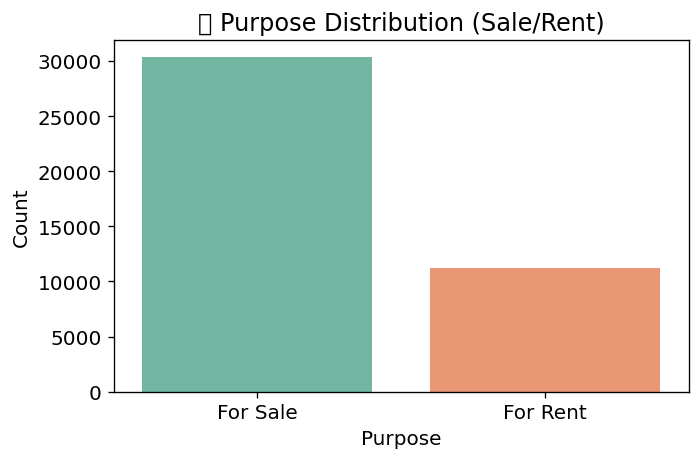

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='purpose', data=df, palette='Set2')
plt.title("🎯 Purpose Distribution (Sale/Rent)")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('purpose_distribution.png', bbox_inches='tight')
plt.show()


<ipython-input-48-2352045979>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data=df, palette='Set2')
<ipython-input-48-2352045979>:6: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-48-2352045979>:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('purpose_distribution.png', bbox_inches='tight', dpi=300)
<ipython-input-48-2352045979>:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('purpose_distribution.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


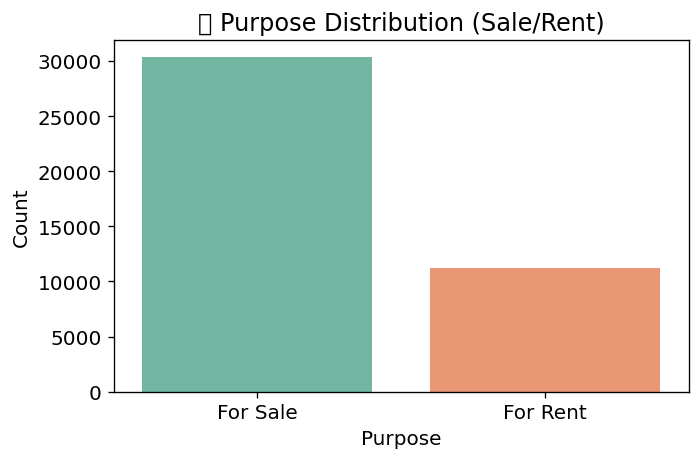

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='purpose', data=df, palette='Set2')
plt.title("🎯 Purpose Distribution (Sale/Rent)")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('purpose_distribution.png', bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-49-3344116189>:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-3344116189>:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig('price_distribution_overall.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


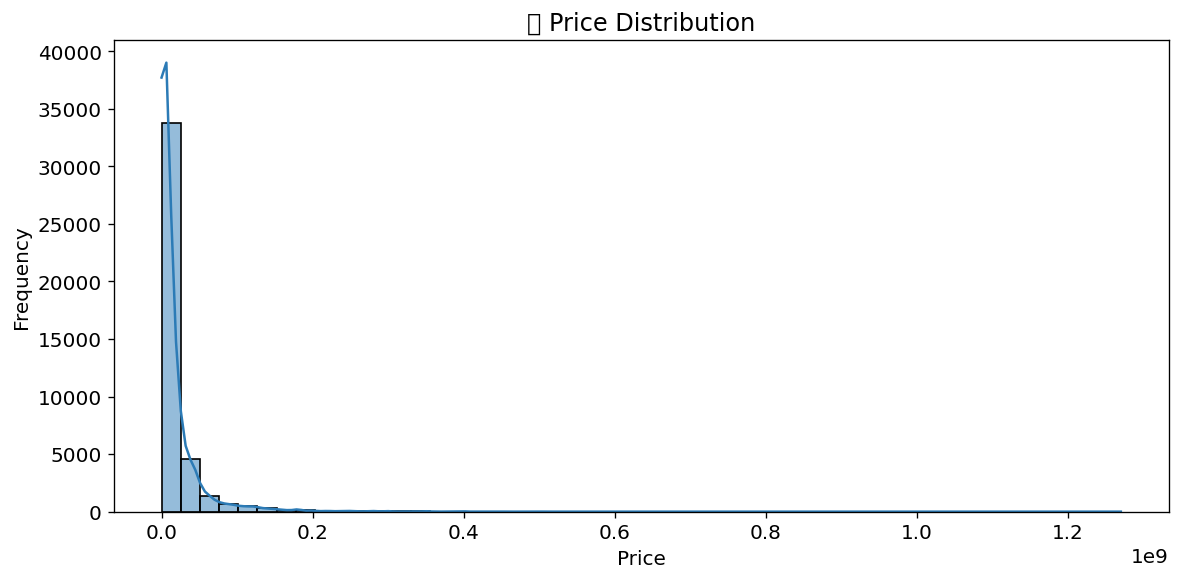

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True, color='#2c7bb6')
plt.title("💰 Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('price_distribution_overall.png', bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-50-645010154>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.index, y=city_avg.values, palette='viridis')
<ipython-input-50-645010154>:7: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-50-645010154>:8: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.savefig('avg_price_by_city.png', bbox_inches='tight', dpi=300)
<ipython-input-50-645010154>:8: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.savefig('avg_price_by_city.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


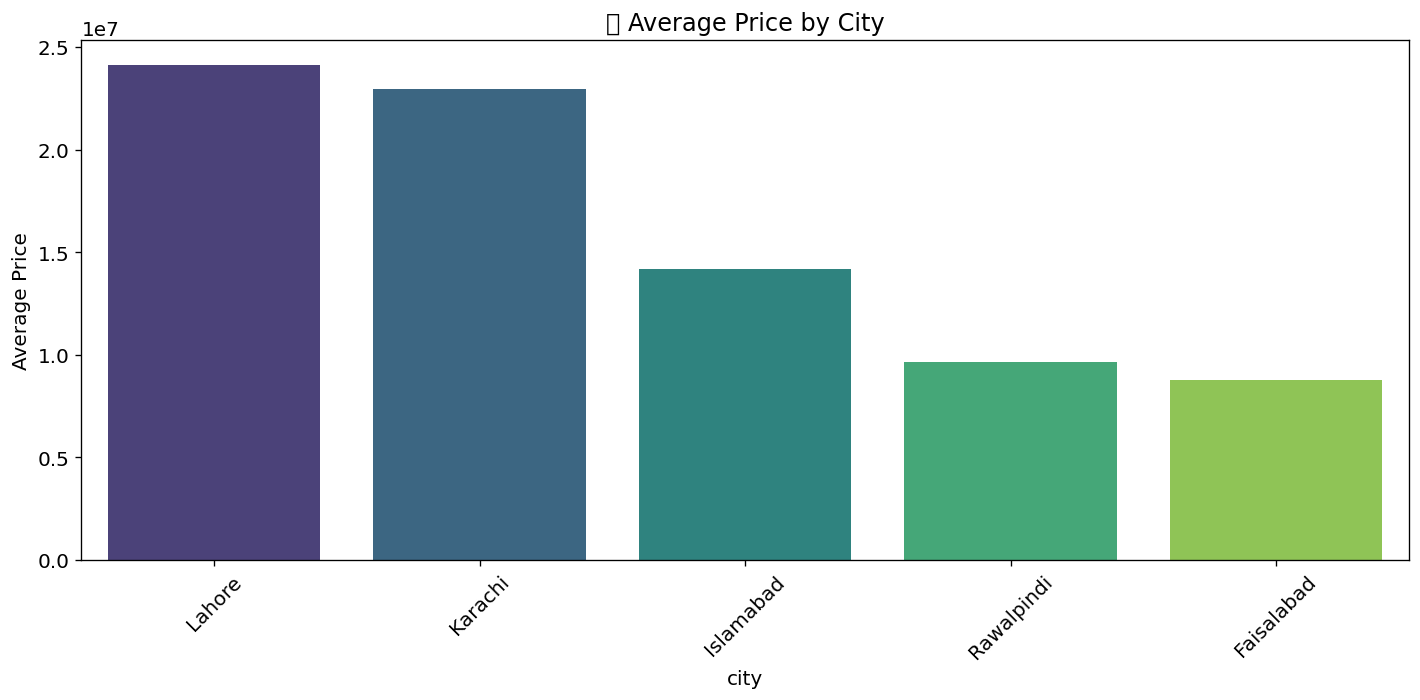

In [50]:
plt.figure(figsize=(12,6))
city_avg = df.groupby('city')['price'].mean().sort_values(ascending=False)
sns.barplot(x=city_avg.index, y=city_avg.values, palette='viridis')
plt.title("🏙️ Average Price by City")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_price_by_city.png', bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-51-3297750881>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette='Set3')
<ipython-input-51-3297750881>:6: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-3297750881>:7: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  plt.savefig('price_by_bedrooms.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


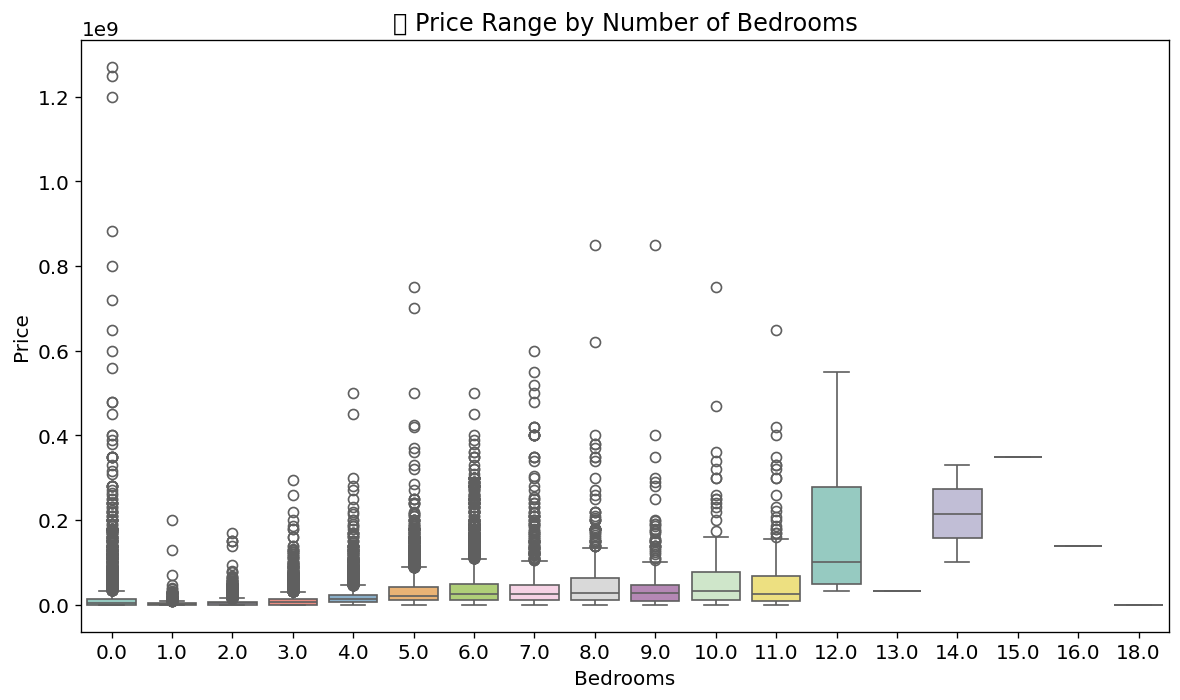

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df, palette='Set3')
plt.title("🛏️ Price Range by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig('price_by_bedrooms.png', bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-52-1656918567>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')
<ipython-input-52-1656918567>:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-1656918567>:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('feature_correlation.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


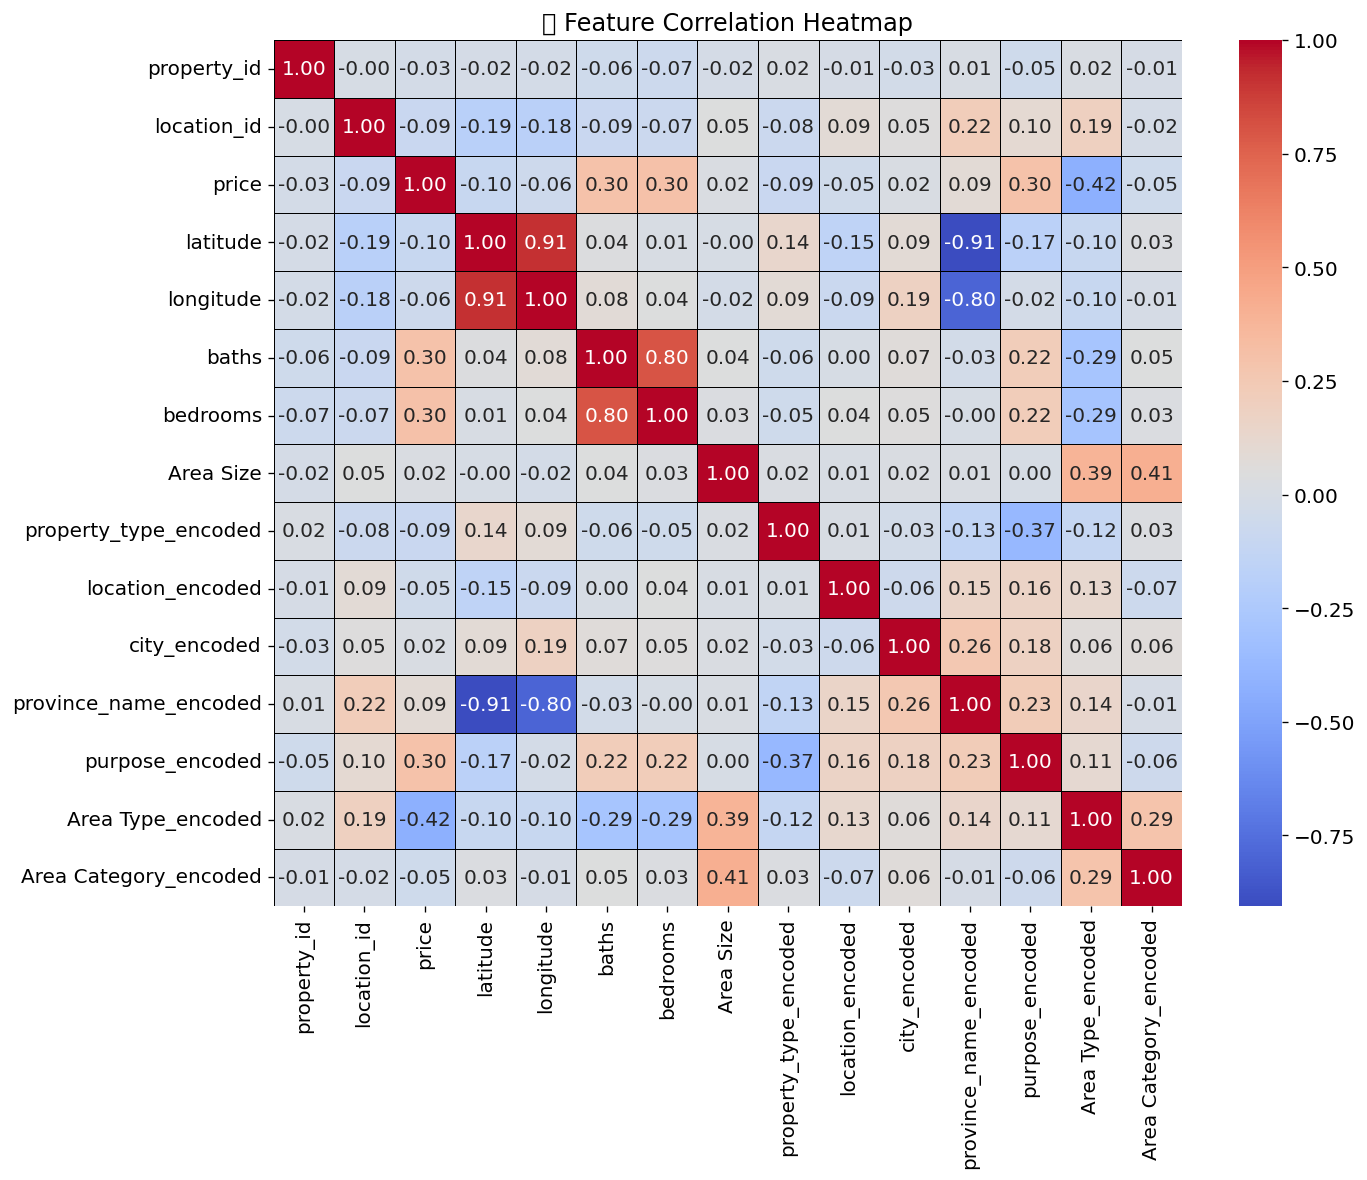

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title("📊 Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig('feature_correlation.png', bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-30-1343860321>:6: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-1343860321>:7: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.savefig('area_vs_price.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


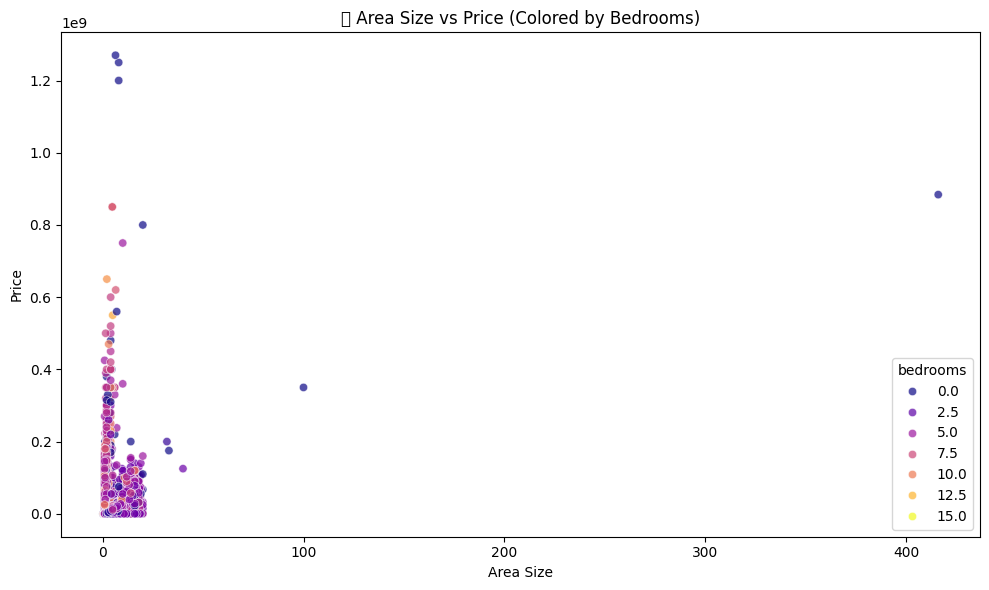

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area Size', y='price', data=df, hue='bedrooms', palette='plasma', alpha=0.7)
plt.title("📐 Area Size vs Price (Colored by Bedrooms)")
plt.xlabel("Area Size")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig('area_vs_price.png', bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-53-1214229632>:14: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('pie_purpose_distribution.png', bbox_inches='tight', dpi=300)
<ipython-input-53-1214229632>:14: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('pie_purpose_distribution.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


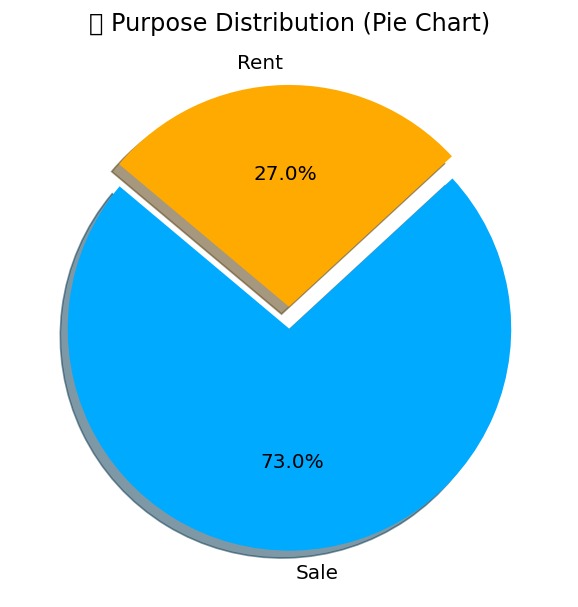

In [53]:
# Value counts for purpose
purpose_counts = df['purpose'].value_counts()

# Labels and colors
labels = ['Sale', 'Rent']  # Adjust according to your actual values if needed
colors = ['#00aaff', '#ffaa00']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(purpose_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0.05), shadow=True)
plt.title('🎯 Purpose Distribution (Pie Chart)')

# Save image
plt.savefig('pie_purpose_distribution.png', bbox_inches='tight', dpi=300)
plt.show()
